## Importing the required libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
sns.set()

## Importing the dataset

The Old Faithful dataset consists of waiting time between eruptions and the duration of eruption. It consists of 272 observations across 2 variables.

In [2]:
# reading the Old Faithful Dataset
data = pd.read_csv('faithful.csv')
data.head()

,Unnamed: 0,eruptions,waiting
0,1,3.600,79
1,2,1.800,54
2,3,3.333,74
3,4,2.283,62
4,5,4.533,85


In [3]:
# removing the unnecessary columns 
X=data.iloc[:,1:3].values
print(X.shape)

(272, 2)


In [4]:
# scaling the data such that mean becomes 0 and variance becomes 1
obj = StandardScaler()
X = obj.fit_transform(X)

## Training model

We are using the K-Means algorithm to cluster the entire dataset into K = 2 clusters. The initial centres of the clusters are chosen randomly (as given in Bishop) and then the K-Means algorithm is run over a maximum 10,000 iterations until it converges. During the E step, we compute to which cluster each point in the dataset belongs to (based on the minimum distance between each point and each cluster). During the M step, we recompute the cluster centres and repeat the entire process until it converges.

In [5]:
#Function for k means which takes data and k as input
def K_Means(x, k, epsilon = 10**(-9)):
    
    #Choosing random indexes for initialising means
    #random_indexes=np.random.choice(len(x),k)

    # considering the maximum iterations to be 10000
    max_iter = 10000
    
    #initialising mu (centroids) values same as that in Bishop
    mu = np.array([[-1.1, 1.8],[1.2, -1.3]])    
    
    prev_cost = 0
    #To store cost and data after each EM steps
    em_costs=[]
    # stores the centroid coordinate
    data_mu = []
    # stores the cluster number for every datapoint
    data_z=[]

    for iteration in range(max_iter):
        # z stores the cluster number for every datapoint
        z=np.zeros(len(x), dtype=np.int8)
        data_mu.append(mu)
        
        for eruption_no in range(len(x)):
            # calculating the norm for the first mu value
            dist=np.linalg.norm(x[eruption_no]-mu[0])
            # looping through the other clusters
            for cluster_no in range(1,k):
                # if we find a distance which is smaller than the current distance -> update the value for that datapoint to belong tp cluster j
                temp = np.linalg.norm(x[eruption_no]-mu[cluster_no])
                if temp <= dist:
                    dist = temp
                    z[eruption_no] = cluster_no
        data_z.append(z)
        
        # for every point in the dataset, cost = mean of the distance between the ith point and the cluster to which it belongs
        cost = np.sum([np.linalg.norm(x[i]-mu[z[i]]) for i in range(len(x))])/len(X)
        em_costs.append(cost)
        
        mu = np.zeros((k,len(x[0])))
        # used to store the number of points that belong to each cluster
        count=np.zeros(k)

        # recomputing the mu values 
        for eruption_no in range(len(x)):
            # adding x_i to the mu value of the cluster to which it belongs
            mu[z[eruption_no]] += x[eruption_no]
            # incrementing the count of points in cluster_j by 1
            count[z[eruption_no]] += 1

        count = count.reshape((k,1))
        for cluster_no in range(k):
            if count[cluster_no]!=0:
                mu[cluster_no] /= count[cluster_no]
        
        cost = (np.sum([np.linalg.norm(x[i]-mu[z[i]]) for i in range(len(x))]))/(len(X)*1.0)
        em_costs.append(cost)

        # if the algorithm converges -> break out of the loop
        if abs(cost-prev_cost)<epsilon:
            break
        
        # updating the previous cost for the next iteration
        prev_cost = cost

    return mu, em_costs, data_mu, data_z

## Running K Means on input Data

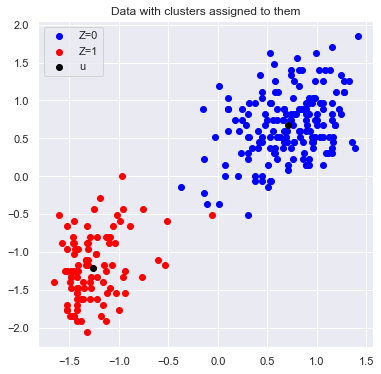

In [6]:
# clustering our data into 2 clusters
mu, cost, dataMu, dataZ = K_Means(X,2)

dataU = np.array(dataMu)
dataZ = np.array(dataZ)
z = np.zeros(len(X))

# for the newly calculated cluster centres, clustering all the datapoints
for eruption_no in range(len(X)):
    dist = np.linalg.norm(X[eruption_no]-mu[0])
    for cluster_no in range(1,len(mu)):
        temp = np.linalg.norm(X[eruption_no] - mu[cluster_no])
        if temp < dist:
            dist = temp
            z[eruption_no] = cluster_no

# getting all points which belong to cluster 0
X0 = X[z==0]
# getting all points which belong to cluster 1
X1 = X[z==1]

plt.figure(figsize=(6,6))
plt.scatter(X0[:,0],X0[:,1],color='blue',label="Z=0")
plt.scatter(X1[:,0],X1[:,1],color='red',label="Z=1")
plt.scatter(mu[:,0],mu[:,1],color='black',label="u")
plt.title("Data with clusters assigned to them")
plt.legend()
plt.show()

## Figure 9.1 

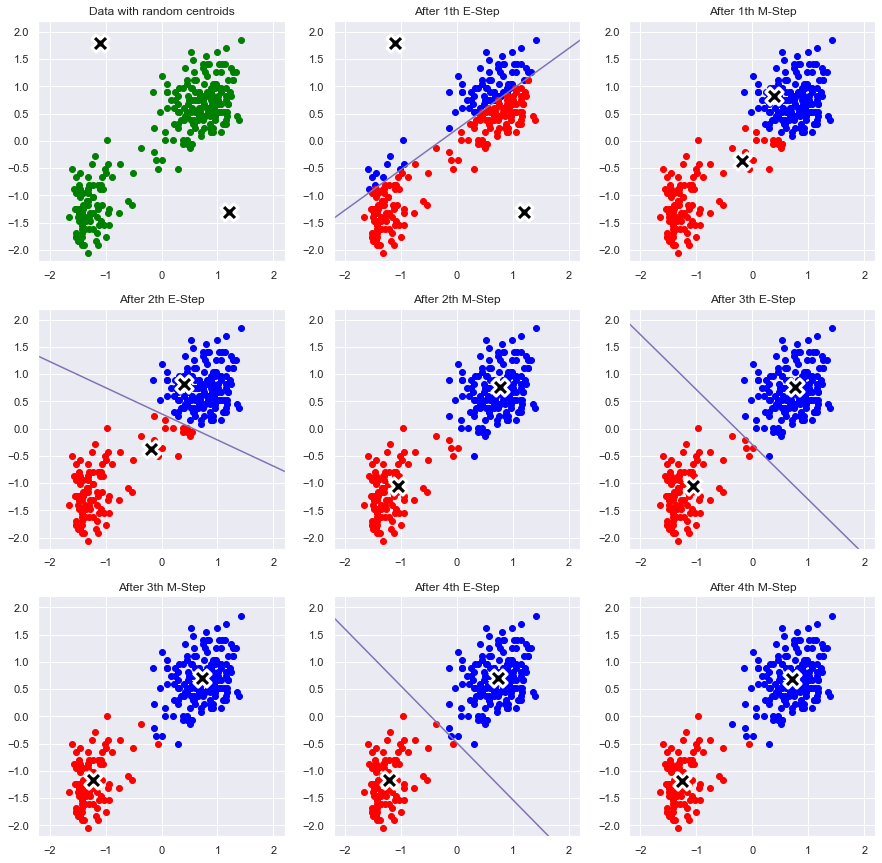

In [7]:
#Calculating two end points on the bisecting line using the point-slope form y=mx+c
def bisectLine(point):
    m = (point[0,1]-point[1,1])/(point[0,0]-point[1,0])
    c = ((point[0,1]+point[1,1])+(point[0,0]+point[1,0])/m )/2
    return np.array([[-3, 3/m+c],[3, -3/m+c]])

#Storing colors for the two clusters
colors={0: "red", 1:"blue"}
plt.figure(figsize=(15,15))
t=0
step=1
for i in range(0,9):
    plt.subplot(3,3,i+1)
    
    #Setting the limits of axis
    plt.xlim(xmax=2.2, xmin=-2.2)
    plt.ylim(ymax=2.2, ymin=-2.2)
    
    if i==0: 
        
        #Plotting the data
        plt.scatter(X[:,0], X[:,1],c='green')
        
        #Plotting the centroids
        plt.scatter(dataU[t][:,0], dataU[t][:,1], s = 300, c='black', marker="X", edgecolors="white", linewidth=3)
        plt.title("Data with random centroids")
    
    else:
        
        #Separating the data based on clusters assigned to them
        X0=X[dataZ[t]==0]
        X1=X[dataZ[t]==1]
        
        #Plotting the data
        plt.scatter(X0[:,0],X0[:,1],color='blue',label="Z=0")
        plt.scatter(X1[:,0],X1[:,1],color='red',label="Z=1")
        
        #Plotting the centroids
        plt.scatter(dataU[t][:,0], dataU[t][:,1], s = 300, c='black', marker="X", edgecolors="white", linewidth=3) #
        
        #Drawing the bisecting line alternatively
        if (i+1)%2==0:
            b = bisectLine(dataU[t])
            plt.plot(b[:,0], b[:,1], 'm-')
            plt.title("After {}th E-Step".format(step))
        else:
            plt.title("After {}th M-Step".format(step))
            step+=1
    if i%2:
        t+=1

## Figure 9.2 Cost after E and M steps

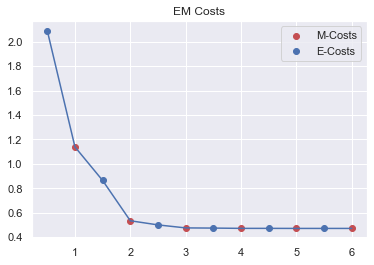

In [8]:
e_costs=[]
m_costs=[]
p=0.5

#Separating the E and M step costs
for i in range(len(cost)):
    if i%2:
        m_costs.append([p,cost[i]])
    else:
        e_costs.append([p,cost[i]])
    p+=0.5

e_costs=np.array(e_costs)
m_costs=np.array(m_costs)

#Plotting the Costs
plt.scatter(m_costs[:,0],m_costs[:,1],color='r',label='M-Costs')
plt.scatter(e_costs[:,0],e_costs[:,1],color='b',label='E-Costs')
plt.legend()
plt.title("EM Costs")
plt.plot(np.arange(0.5,len(cost),0.5)[:len(cost)],cost)